In [ ]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle #folder create

In [ ]:
!mv kaggle.json ~/.kaggle/  #  move


In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species  #Download

 99% 1.94G/1.96G [00:25<00:00, 168MB/s]
100% 1.96G/1.96G [00:25<00:00, 82.9MB/s]


In [ ]:
!unzip 100-bird-species.zip #unzip


Streaming output truncated to the last 5000 lines.
  inflating: train/WHITE TAILED TROPIC/120.jpg  
  inflating: train/WHITE TAILED TROPIC/121.jpg  
  inflating: train/WHITE TAILED TROPIC/122.jpg  
  inflating: train/WHITE TAILED TROPIC/123.jpg  
  inflating: train/WHITE TAILED TROPIC/124.jpg  
  inflating: train/WHITE TAILED TROPIC/125.jpg  
  inflating: train/WHITE TAILED TROPIC/126.jpg  
  inflating: train/WHITE TAILED TROPIC/127.jpg  
  inflating: train/WHITE TAILED TROPIC/128.jpg  
  inflating: train/WHITE TAILED TROPIC/129.jpg  
  inflating: train/WHITE TAILED TROPIC/130.jpg  
  inflating: train/WHITE TAILED TROPIC/131.jpg  
  inflating: train/WHITE TAILED TROPIC/132.jpg  
  inflating: train/WHITE TAILED TROPIC/133.jpg  
  inflating: train/WHITE TAILED TROPIC/134.jpg  
  inflating: train/WHITE TAILED TROPIC/135.jpg  
  inflating: train/WHITE TAILED TROPIC/136.jpg  
  inflating: train/WHITE TAILED TROPIC/137.jpg  
  inflating: train/WHITE TAILED TROPIC/138.jpg  
  inflating: train

# New Section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path
import glob
import os


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Conv2D, BatchNormalization,MaxPooling2D, GlobalAveragePooling2D, Resizing, Rescaling
from tensorflow.keras import optimizers
from tensorflow.keras import Model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications import MobileNetV2
from keras.models import load_model
import tensorflow.keras.utils

In [ ]:
df = pd.read_csv('/content/birds.csv')
df.head(2)

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [ ]:
test_CSV = df[df['data set'] == 'test']

In [ ]:
test_CSV.head(2) 

,class id,filepaths,labels,data set,scientific name
84635,0.0,test/ABBOTTS BABBLER/1.jpg,ABBOTTS BABBLER,test,MALACOCINCLA ABBOTTI
84636,0.0,test/ABBOTTS BABBLER/2.jpg,ABBOTTS BABBLER,test,MALACOCINCLA ABBOTTI


In [ ]:
processed_data_directory = '/content/'

In [ ]:
path = '/content/train/'
image_dir = Path(path)

In [ ]:
filepaths = list(image_dir.glob(r'*/*.jpg')) 
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))
species_types=os.listdir(path)


In [ ]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels,name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels],axis=1)
# image_df

In [ ]:
image_df

,Filepath,Label
0,/content/train/PYRRHULOXIA/100.jpg,PYRRHULOXIA
1,/content/train/PYRRHULOXIA/148.jpg,PYRRHULOXIA
2,/content/train/PYRRHULOXIA/060.jpg,PYRRHULOXIA
3,/content/train/PYRRHULOXIA/190.jpg,PYRRHULOXIA
4,/content/train/PYRRHULOXIA/019.jpg,PYRRHULOXIA
...,...,...
84630,/content/train/RED SHOULDERED HAWK/164.jpg,RED SHOULDERED HAWK
84631,/content/train/RED SHOULDERED HAWK/115.jpg,RED SHOULDERED HAWK
84632,/content/train/RED SHOULDERED HAWK/154.jpg,RED SHOULDERED HAWK
84633,/content/train/RED SHOULDERED HAWK/050.jpg,RED SHOULDERED HAWK


In [ ]:
s_top15 = image_df['Label'].value_counts(ascending=False)
s_top15

RUFOUS TREPE               263
HOUSE FINCH                248
D-ARNAUDS BARBET           233
OVENBIRD                   233
ASIAN GREEN BEE EATER      220
                          ... 
PATAGONIAN SIERRA FINCH    130
EURASIAN GOLDEN ORIOLE     130
RED TAILED THRUSH          130
NORTHERN RED BISHOP        130
SNOWY PLOVER               130
Name: Label, Length: 525, dtype: int64

In [ ]:
top_list = s_top15.index.to_list()
top_list = top_list[0:30]
top_list

['RUFOUS TREPE',
 'HOUSE FINCH',
 'D-ARNAUDS BARBET',
 'OVENBIRD',
 'ASIAN GREEN BEE EATER',
 'SWINHOES PHEASANT',
 'WOOD DUCK',
 'CASPIAN TERN',
 'RED BILLED TROPICBIRD',
 'WOOD THRUSH',
 'PYRRHULOXIA',
 'FRILL BACK PIGEON',
 'MERLIN',
 'MILITARY MACAW',
 'ORNATE HAWK EAGLE',
 'OYSTER CATCHER',
 'LAUGHING GULL',
 'EASTERN YELLOW ROBIN',
 'JACOBIN PIGEON',
 'GREATER PRAIRIE CHICKEN',
 'DARK EYED JUNCO',
 'RED TAILED HAWK',
 'YELLOW BREASTED CHAT',
 'VIOLET BACKED STARLING',
 'VIOLET GREEN SWALLOW',
 'PLUSH CRESTED JAY',
 'RED KNOT',
 'LIMPKIN',
 'SORA',
 'GREY HEADED CHACHALACA']

In [ ]:
image_df = image_df[image_df['Label'].isin(top_list)]
image_df.reset_index(inplace=True)


In [ ]:
train_df, test_df = train_test_split(image_df, 
                                     test_size=0.2,
                                     shuffle=True,
                                     random_state=101)

In [ ]:
train_gen = ImageDataGenerator(
    # due to the nature of mobilnetv2 the input images have to be at least 224x224
    # loaded with a range [0,1]
    # and then normalized using mean = [0.485, 0.456, 0.406] 
    # and std = [0.229, 0.224, 0.225]
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

test_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [ ]:
# Split the data into three categories
train_images = train_gen.flow_from_dataframe(
    dataframe=train_df, # training data from test train split
    x_col='Filepath', # flow from dataframe(ffd), setting x
    y_col='Label', # ffd setting y (need this as we have set class_mode to categorical)
    target_size=(224,224), # set image size
    color_mode='rgb', # default
    class_mode='categorical',# this is multi class classification problem
    batch_size=32, # batch size
    shuffle=True, # set to true for train/val. set to false for test
    seed=30, # random seed set
    subset='training' # needs to be set as validation is used
)

val_images = train_gen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=30,
    subset='validation' 
)

test_images = test_gen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 4057 validated image filenames belonging to 30 classes.
Found 1014 validated image filenames belonging to 30 classes.
Found 1268 validated image filenames belonging to 30 classes.


In [ ]:
# Resize Layer
resize_and_rescale = tf.keras.Sequential([
    # incase some of the images are not the right size
    Resizing(224,224),
    # rescale the images to be in the range [0,1]
    Rescaling(1./255),
])

Model
This model will be an implementation of transfer learning. It will use the MobileNetV2 model as the base model. This implementation will be as follows:

The layers from this base model will be frozen.
Some new trainable layers are added to the model
The new layers are trained on the bird dataset
An optional step at the end is fine-tuning
Keras transfer learning guide


In [ ]:
# clear so a fresh model each time
tf.keras.backend.clear_session()

base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
# freezing the base model layers
base_model.trainable=False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
from keras.layers import Flatten, GlobalAveragePooling2D
inputs = base_model.input # base model loaded
x = resize_and_rescale(inputs) #apply resize and rescale
x = Dense(256, activation='relu')(base_model.output) # add a layer
x = Dropout(0.2)(x) # add a dropout layer
x = Flatten()(x) # add Flatten layer
x = Dense(256,activation='relu')(x)
x = Dropout(0.1)(x)

# outputs = 15 classes with softmax activation due to classification problem
outputs = Dense(30,activation='softmax')(x) 

model =  Model(inputs=inputs, outputs=outputs)

# model.summary()

In [ ]:
import joblib
from sklearn.model_selection import train_test_split
import numpy as np

import pandas as pd
#import skopt
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution1D, AveragePooling1D,Convolution2D,AveragePooling2D,MaxPooling1D,MaxPooling2D
from keras.layers import concatenate
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import scipy.stats as stats
import numpy as np

import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import sys
# In[3]:

#from skopt import BayesSearchCV
from sklearn import svm
from sklearn.model_selection import GridSearchCV

from keras.callbacks import ModelCheckpoint, EarlyStopping
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
import tensorflow as tf
from tensorflow import keras

import numpy as np
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
print(tf.__version__)
#from kerastuner import HyperModel, Objective
import tensorflow as tf
#from kerastuner.tuners import BayesianOptimization
import joblib
from sklearn.model_selection import train_test_split
import numpy as np

import pandas as pd

from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

import numpy as np

import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import sys
# In[3]:


from sklearn import svm
from sklearn.model_selection import GridSearchCV


from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
#from skopt import BayesSearchCV
#from kerastuner import HyperModel, Objective
import tensorflow as tf
#from kerastuner.tuners import BayesianOptimization
from keras.callbacks import ModelCheckpoint, EarlyStopping

2.12.0


In [ ]:
layer_outputs2 = [layer.output for layer in model.layers]
layer_outputs2

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 112, 112, 32) dtype=float32 (created by layer 'Conv1')>,
 <KerasTensor: shape=(None, 112, 112, 32) dtype=float32 (created by layer 'bn_Conv1')>,
 <KerasTensor: shape=(None, 112, 112, 32) dtype=float32 (created by layer 'Conv1_relu')>,
 <KerasTensor: shape=(None, 112, 112, 32) dtype=float32 (created by layer 'expanded_conv_depthwise')>,
 <KerasTensor: shape=(None, 112, 112, 32) dtype=float32 (created by layer 'expanded_conv_depthwise_BN')>,
 <KerasTensor: shape=(None, 112, 112, 32) dtype=float32 (created by layer 'expanded_conv_depthwise_relu')>,
 <KerasTensor: shape=(None, 112, 112, 16) dtype=float32 (created by layer 'expanded_conv_project')>,
 <KerasTensor: shape=(None, 112, 112, 16) dtype=float32 (created by layer 'expanded_conv_project_BN')>,
 <KerasTensor: shape=(None, 112, 112, 96) dtype=float32 (created by layer 'block_1_expand')>,
 <KerasTensor: shape=(None, 112, 11

In [ ]:
len(layer_outputs2)

161

In [ ]:
def extract_layers(main_model, starting_layer_ix, ending_layer_ix):
    
  # create an empty model
    new_model = Sequential()
    for ix in range(starting_layer_ix, ending_layer_ix + 1):
        curr_layer = main_model.get_layer(index=ix)
    # copy this layer over to the new model
        new_model.add(curr_layer)
    return new_model

In [ ]:
from keras.models import Sequential


In [ ]:
extract_layers1=extract_layers(model, 0,100)

ValueError: ignored

In [ ]:
# initially used BinaryCrossentropy
# not a suitable loss function for this dataset
# loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)

loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(loss=loss,optimizer='adam',metrics=['accuracy'])

In [ ]:
epochs = 10

In [ ]:
history = model.fit(
    train_images, # this is essential train_X and train_y
    steps_per_epoch=len(train_images),
    validation_data=val_images, # this is val_X and val_y
    validation_steps=len(val_images),
    epochs=epochs,
    
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1654/1654 [==============================] - 191s 108ms/step - loss: 2.4509 - accuracy: 0.4389 - val_loss: 1.1467 - val_accuracy: 0.6983
Epoch 2/10
1654/1654 [==============================] - 177s 107ms/step - loss: 1.2016 - accuracy: 0.6758 - val_loss: 0.9476 - val_accuracy: 0.7490
Epoch 3/10
1654/1654 [==============================] - 173s 104ms/step - loss: 0.9512 - accuracy: 0.7371 - val_loss: 0.9071 - val_accuracy: 0.7606
Epoch 4/10
1654/1654 [==============================] - 189s 114ms/step - loss: 0.8136 - accuracy: 0.7671 - val_loss: 0.8633 - val_accuracy: 0.7732
Epoch 5/10
1654/1654 [==============================] - 186s 113ms/step - loss: 0.7226 - accuracy: 0.7922 - val_loss: 0.8563 - val_accuracy: 0.7791
Epoch 6/10
1654/1654 [==============================] - 187s 113ms/step - loss: 0.6512 - accuracy: 0.8094 - val_loss: 0.8553 - val_accuracy: 0.7820
Epoch 7/10
1654/1654 [==============================] - 181s 109ms/step - loss: 0.5943 - accuracy: 0.8256 - val_loss: 0.855

In [ ]:
# saving the model and history

# history.model.save('mnv2_cc_loss_model.tf')
# np.save('mobilenetv2_cc_loss.npy',history.history)

In [ ]:
# loading model and history
# model = load_model('mnv2_cc_loss_model.tf')
# history=np.load('mobilenetv2_cc_loss.npy',allow_pickle='TRUE').item()

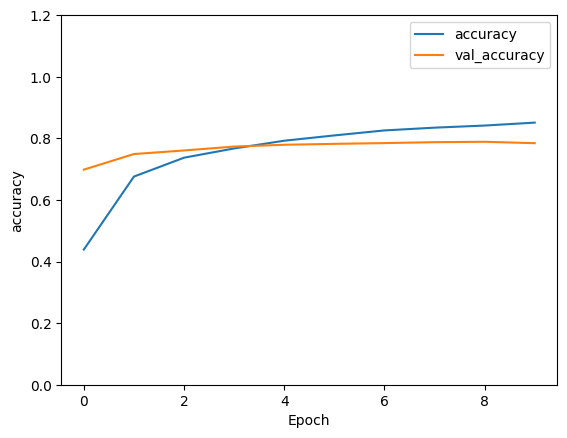

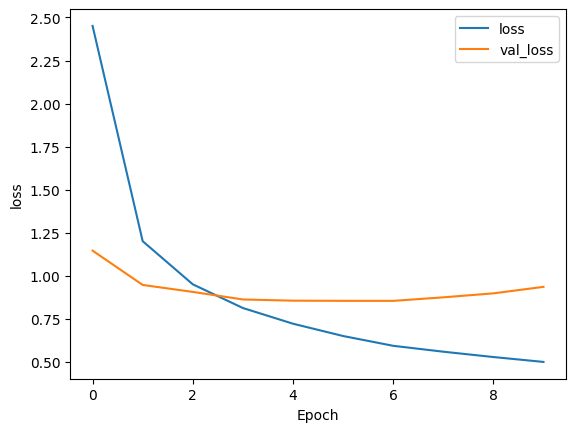

In [ ]:
def plotter(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel('Epoch')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  

plotter(history, 'accuracy')
plt.ylim(0,1.2)
plt.show()
plotter(history, 'loss')
plt.show()


517/517 [==============================] - 43s 83ms/step - loss: 0.9196 - accuracy: 0.7801
Accuracy on test set: 78.01%
              precision    recall  f1-score   support

           0       0.62      0.51      0.56        39
           1       0.62      0.57      0.60        35
           2       0.92      0.92      0.92        36
           3       0.93      1.00      0.97        28
           4       0.56      0.73      0.64        30
           5       0.70      0.61      0.65        23
           6       0.85      0.88      0.87        26
           7       0.50      0.78      0.61        36
           8       0.86      0.81      0.83        37
           9       0.70      0.68      0.69        31
          10       0.88      0.95      0.92        40
          11       0.65      0.84      0.73        31
          12       0.62      0.42      0.50        24
          13       0.96      0.71      0.81        34
          14       0.79      0.85      0.82        27
          15   

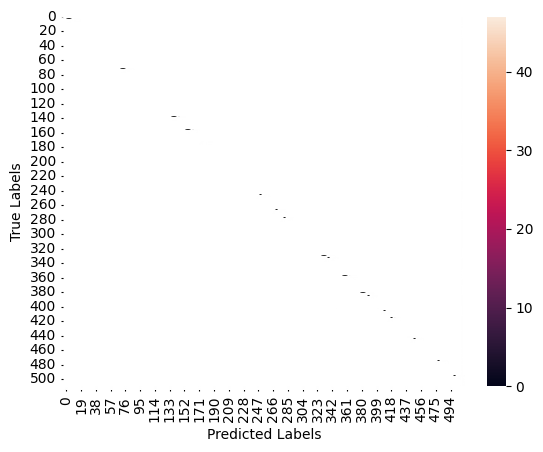

In [ ]:
# setting up preds
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred,axis=1) # used to select the class with the highest probability


# converting the y_test label(a string) to the class index
species = test_images.class_indices
y_test = list(test_df.Label)
y_test = [species[bird_class] for bird_class in y_test]


# metrics, reporting and viz
results = model.evaluate(test_images)
print(f'Accuracy on test set: {results[1]*100:.2f}%')
report = classification_report(y_test, y_pred,output_dict = True)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
def predictor(model,train_df,species_dict):
        
        rand = train_df.sample()
        # print(rand)
        image_path = str(rand['Filepath'].values[0])
        label = rand['Label'].values[0]
        # load the img and covert to an array
        img = load_img(image_path)
        img = img_to_array(img)
        # make it correct size and preprocess it
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        # make a prediction
        img_pred = model.predict(img,verbose=0)
        img_pred = np.argmax(img_pred,axis=1)
        # get the class corresponding to the class index
        bird_class = [k for k,v in species_dict.items() if img_pred == v]
        
        fig, ax = plt.subplots(1,1, figsize = (10,6))
        ax.imshow(plt.imread(image_path))
        ax.set_title(f'True:{label}\nPred:{bird_class[0]}')
        ax.axis('off')
        # return print(f'Predicted classification: {bird_class[0]}') 

        

In [ ]:
path = '/content/test/'
image_dir = Path(path)

In [ ]:
filepaths = list(image_dir.glob(r'*/*.jpg')) 
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))
species_types=os.listdir(path)

In [ ]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels,name='Label')

# Concatenate filepaths and labels
test_image_df = pd.concat([filepaths, labels],axis=1)
# image_df

In [ ]:
test_image_df = test_image_df[test_image_df['Label'].isin(top_list)]
test_image_df.reset_index(inplace=True)


In [ ]:
test_dir_images = test_gen.flow_from_dataframe(
    dataframe=test_image_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2550 validated image filenames belonging to 510 classes.


80/80 [==============================] - 6s 77ms/step - loss: 0.5033 - accuracy: 0.8722
Accuracy on test set: 87.22%
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      0.40      0.57         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         5
           4       1.00      0.80      0.89         5
           5       0.80      0.80      0.80         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      0.80      0.89         5
          10       1.00      0.80      0.89         5
          11       0.75      0.60      0.67         5
          12       1.00      0.60      0.75         5
          13       1.00      0.80      0.89         5
          14       1.00      1.00      1.00         5
          15      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

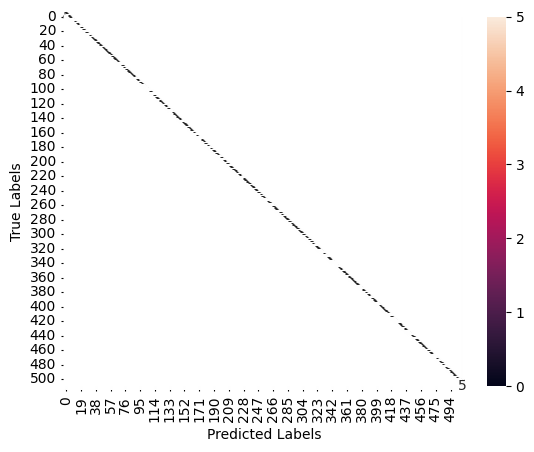

In [ ]:
y_pred = model.predict(test_dir_images)
y_pred = np.argmax(y_pred,axis=1) # used to select the class with the highest probability


# converting the y_test label(a string) to the class index
species = test_dir_images.class_indices
y_test = list(test_image_df.Label)
y_test = [species[bird_class] for bird_class in y_test]


# metrics, reporting and viz
results = model.evaluate(test_dir_images)
print(f'Accuracy on test set: {results[1]*100:.2f}%')
report = classification_report(y_test, y_pred,output_dict = True)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


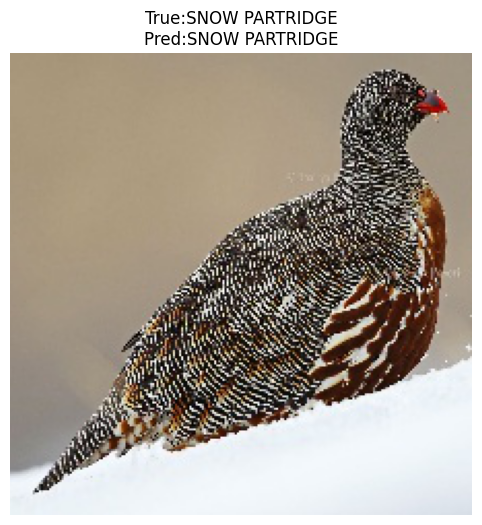

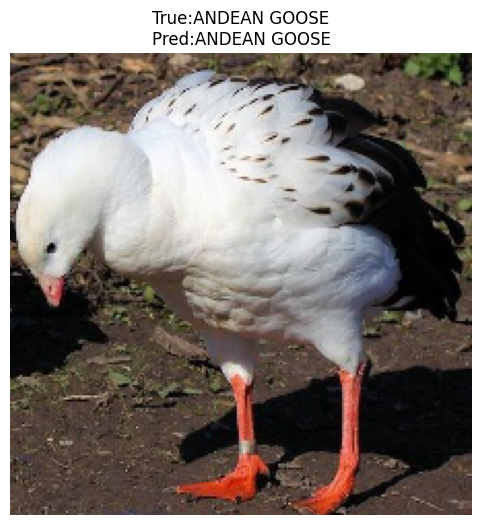

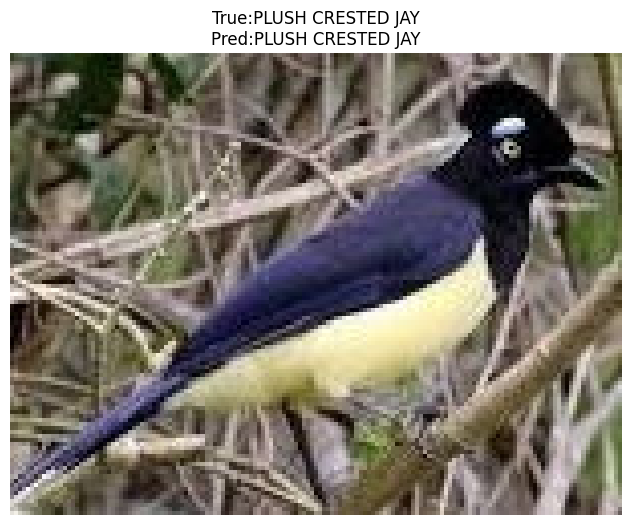

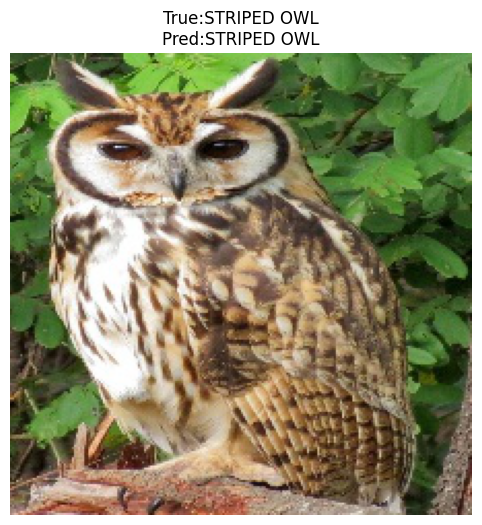

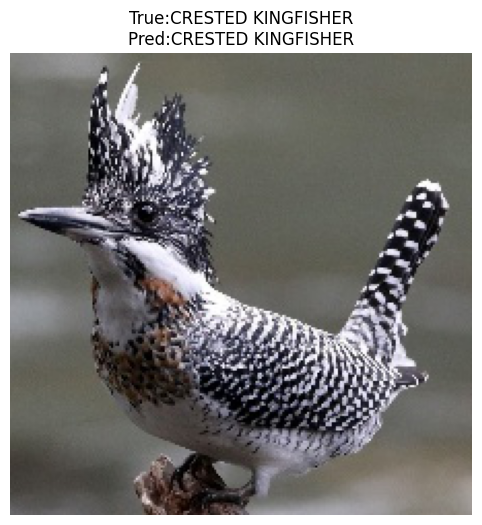

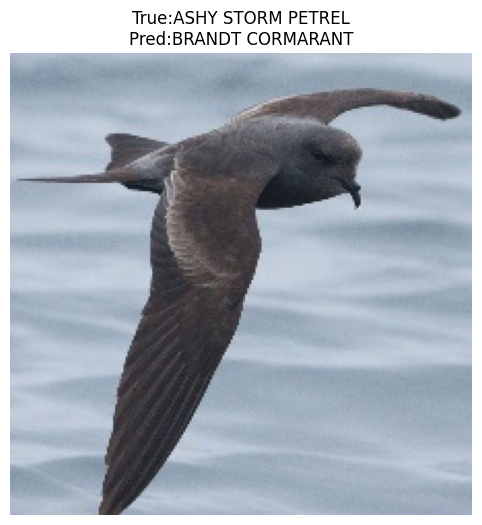

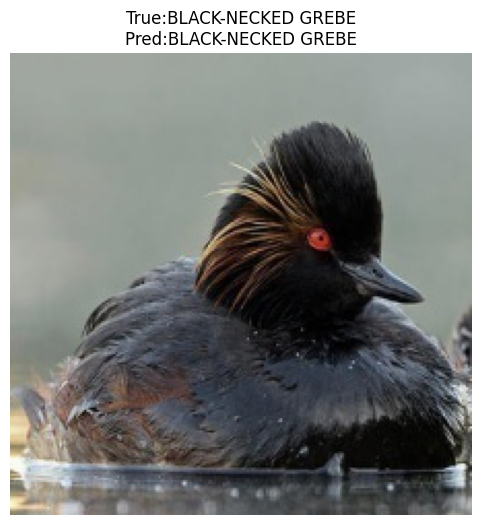

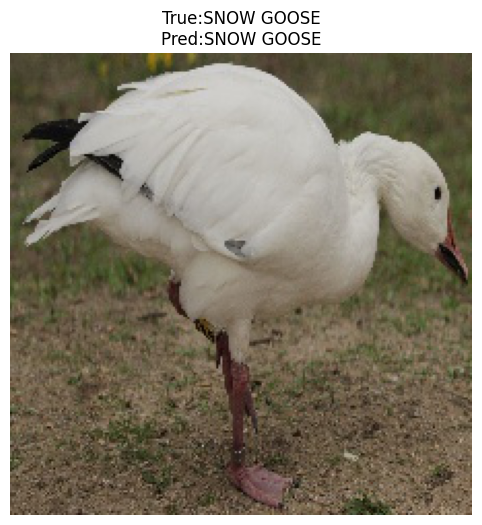

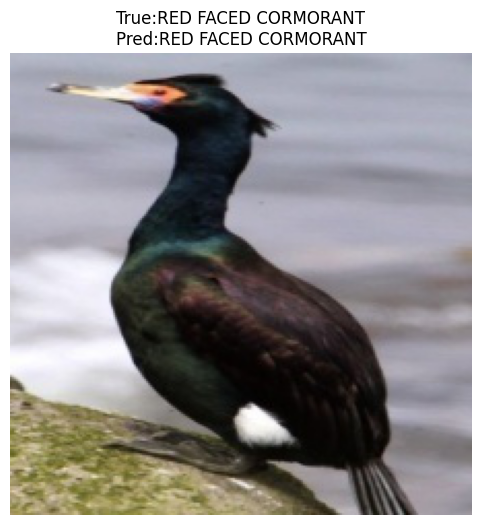

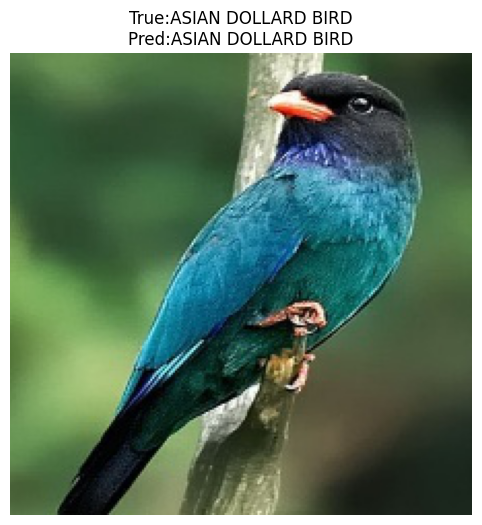

In [ ]:
for i in range(10):
    predictor(model,test_image_df,species)
    plt.show()